<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_6_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 6
Ojasa Chitre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

1. Create time series data.

· Replication requirements: What you’ll need to reproduce the analysis

· Creating time series objects: Convert your data to a time series object for time series analysis.

In [ ]:
stockData = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab6/Stock/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
stockData.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


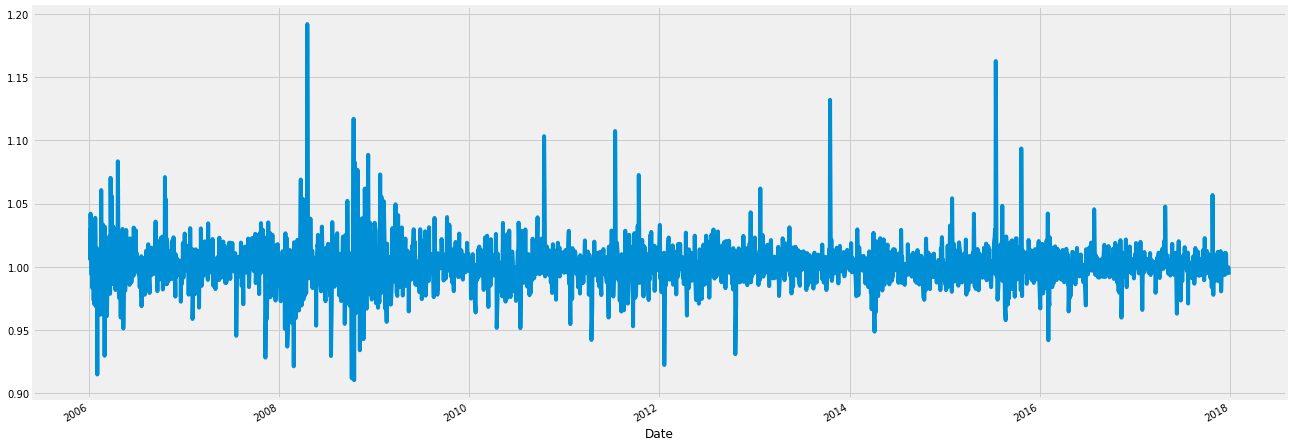

In [ ]:
stockData['Change'] = stockData.High.div(stockData.High.shift())
stockData['Change'].plot(figsize=(20,8))

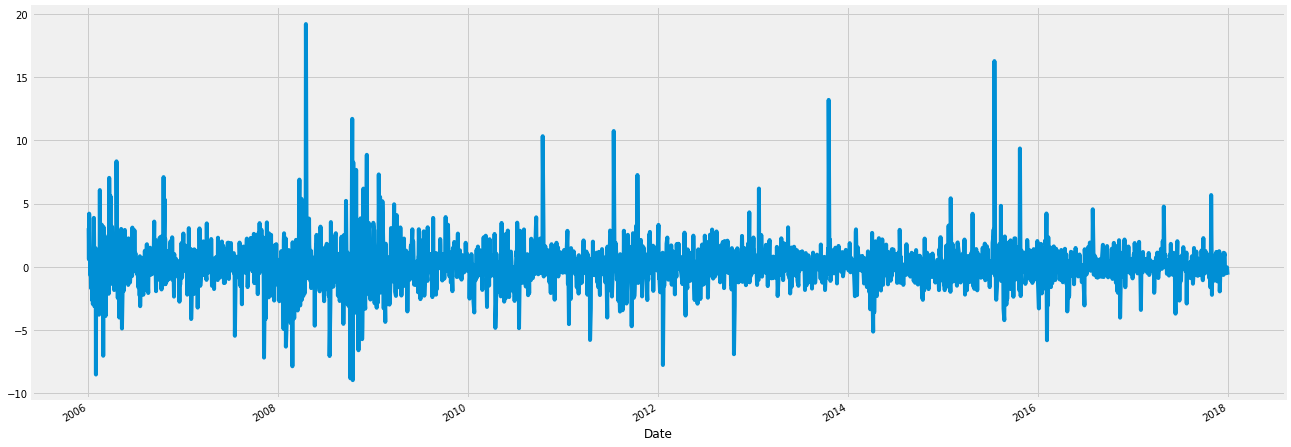

In [ ]:
stockData['Return'] = stockData.Change.sub(1).mul(100)
stockData['Return'].plot(figsize=(20,8))

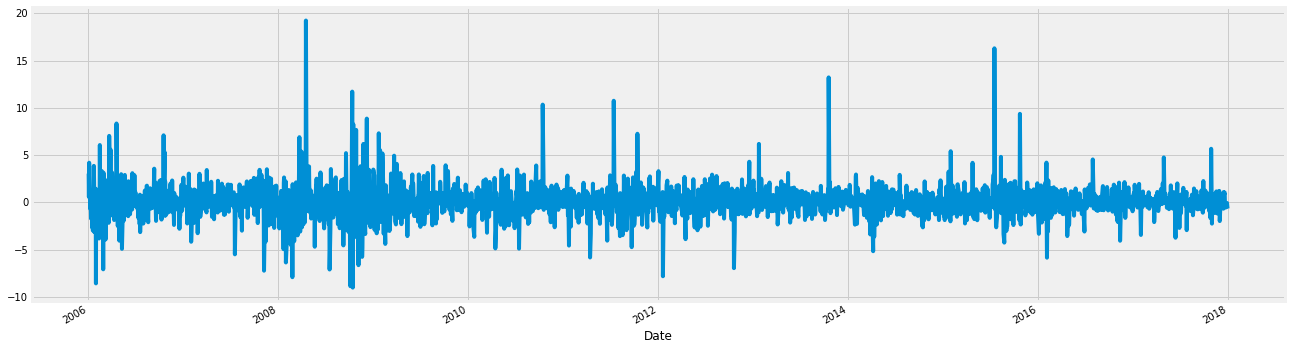

In [ ]:
stockData.High.pct_change().mul(100).plot(figsize=(20,6))

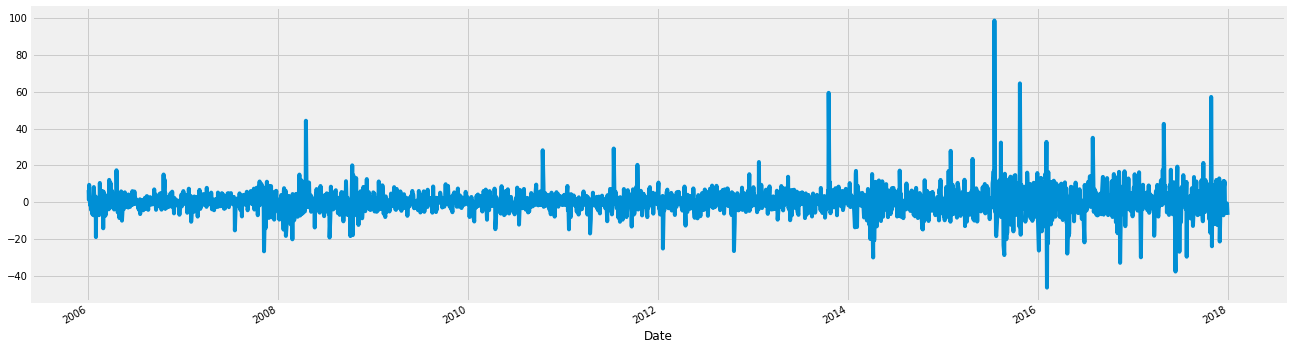

In [ ]:
stockData.High.diff().plot(figsize=(20,6))

In [ ]:
stockData1 = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab6/Stock/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

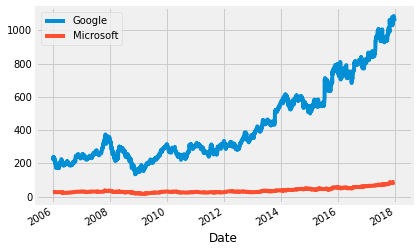

In [ ]:
stockData.High.plot()
stockData1.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

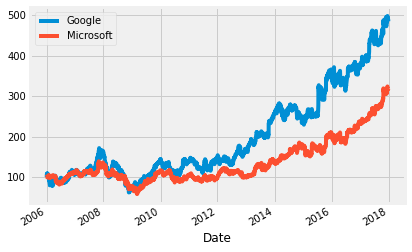

In [ ]:
normalized_stockData = stockData.High.div(stockData.High.iloc[0]).mul(100)
normalized_stockData1 = stockData1.High.div(stockData1.High.iloc[0]).mul(100)
normalized_stockData.plot()
normalized_stockData1.plot()
plt.legend(['Google','Microsoft'])
plt.show()

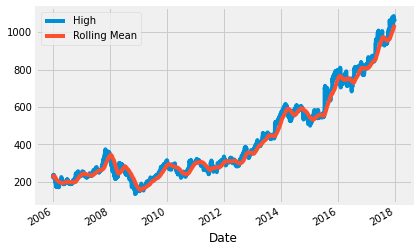

In [ ]:
rolling_stockData = stockData.High.rolling('90D').mean()
stockData.High.plot()
rolling_stockData.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

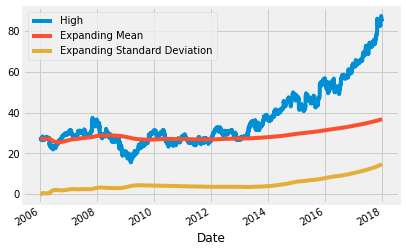

In [ ]:
stockData1_mean = stockData1.High.expanding().mean()
stockData1_std = stockData1.High.expanding().std()
stockData1.High.plot()
stockData1_mean.plot()
stockData1_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

2. Accommodate trend, as well as seasonal and event-related variation, in time series models.

· Time series plots: Basic visualization of ts objects and differentiating trends, seasonality, and cycle variation.

· Seasonal plots: Plotting seasonality trends in time series data.

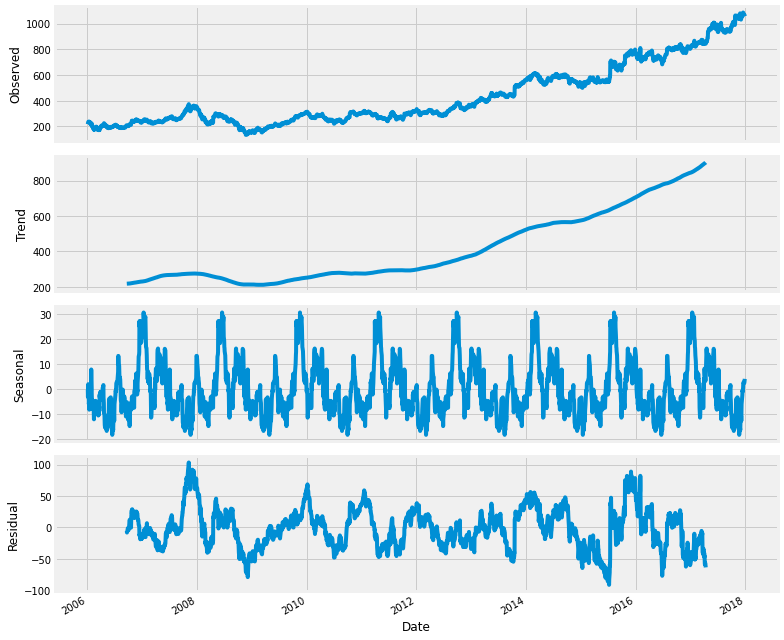

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_stockData_volume = sm.tsa.seasonal_decompose(stockData["High"],freq=360) 
figure = decomposed_stockData_volume.plot()
plt.show()

4. White noise: Differentiating signal from the noise.

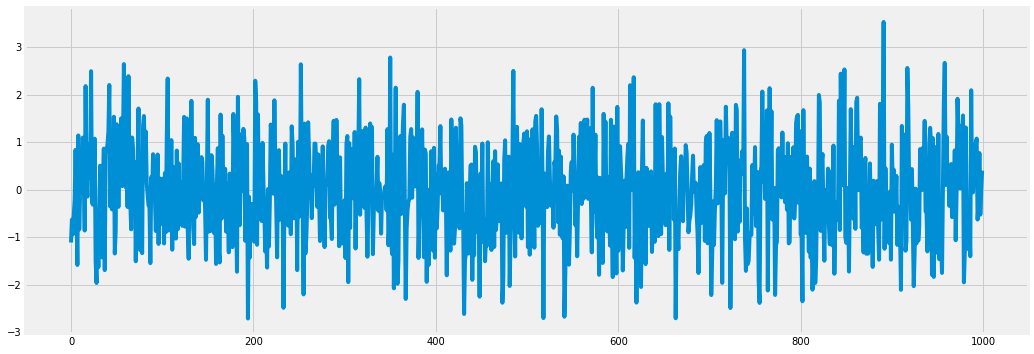

In [ ]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

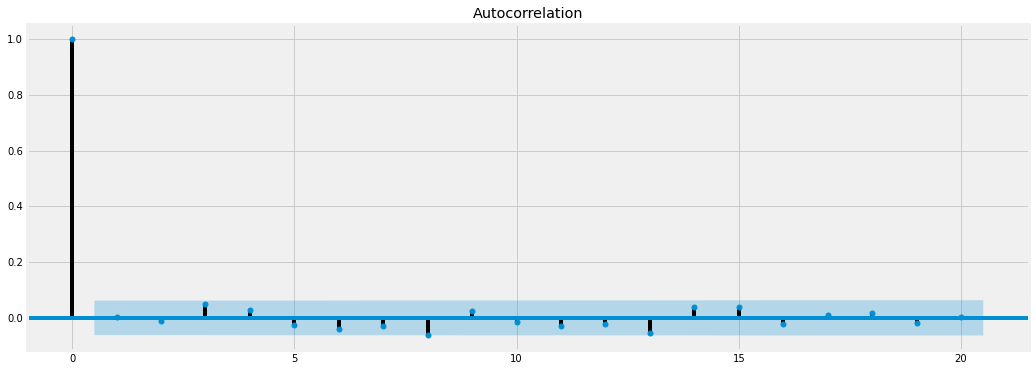

In [ ]:
plot_acf(white_noise,lags=20)
plt.show()

In [ ]:
adf = adfuller(stockData1["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(stockData["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776520207
p-value of google: 6.510719605768194e-07


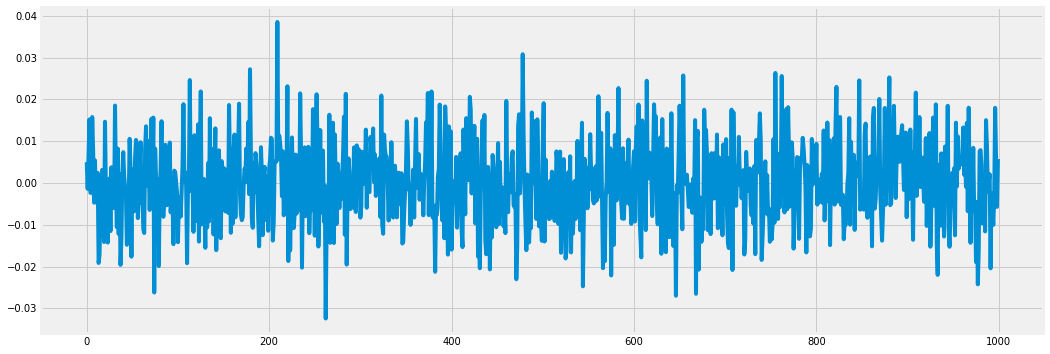

In [ ]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

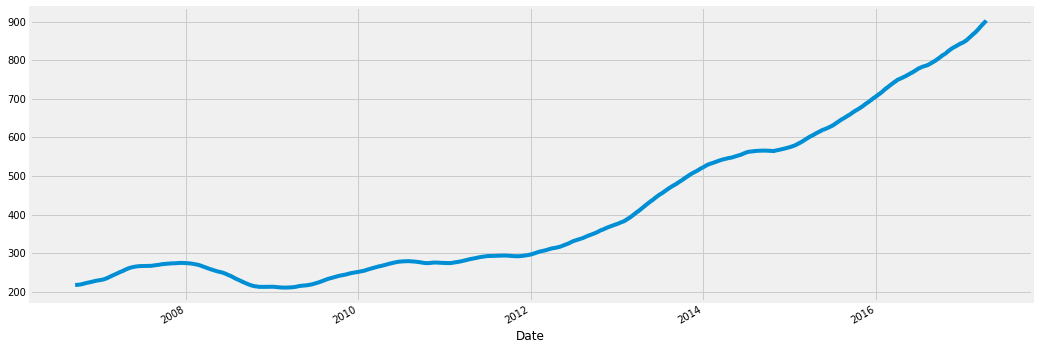

In [ ]:
decomposed_stockData_volume.trend.plot()

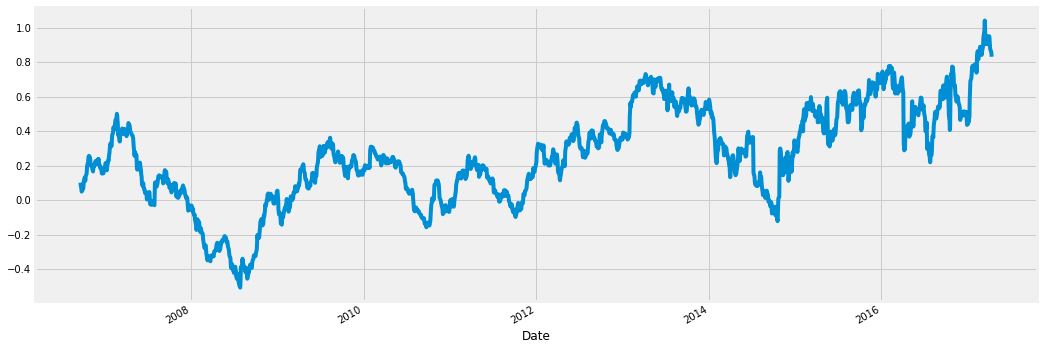

In [ ]:
decomposed_stockData_volume.trend.diff().plot()

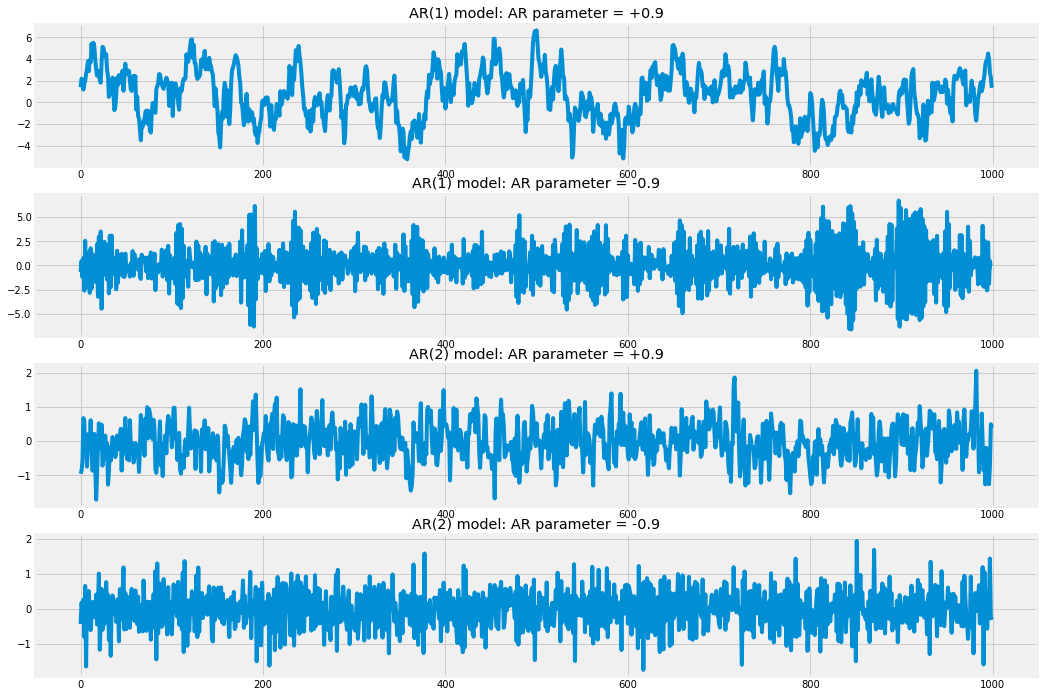

In [ ]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) 
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)


plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) 
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)

plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) 
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)

plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) 
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [ ]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Tue, 05 Apr 2022   AIC                           2837.403
Time:                        15:17:46   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

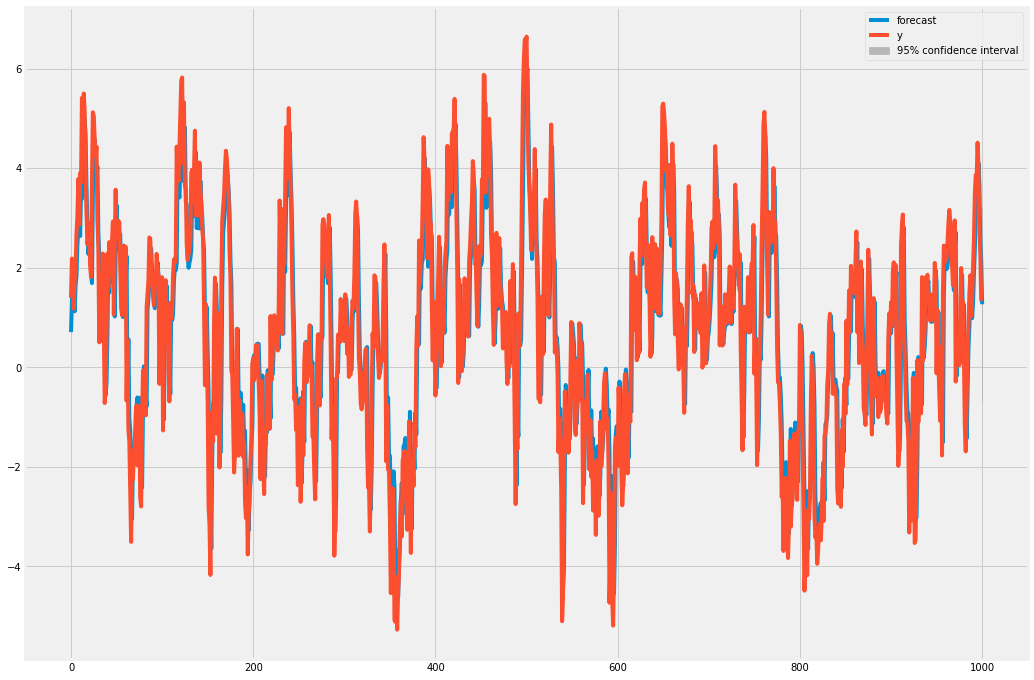

In [ ]:
result.plot_predict(start=0, end=1000)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(sim1[0:1000], result.predict(start=0,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.996169849649981.


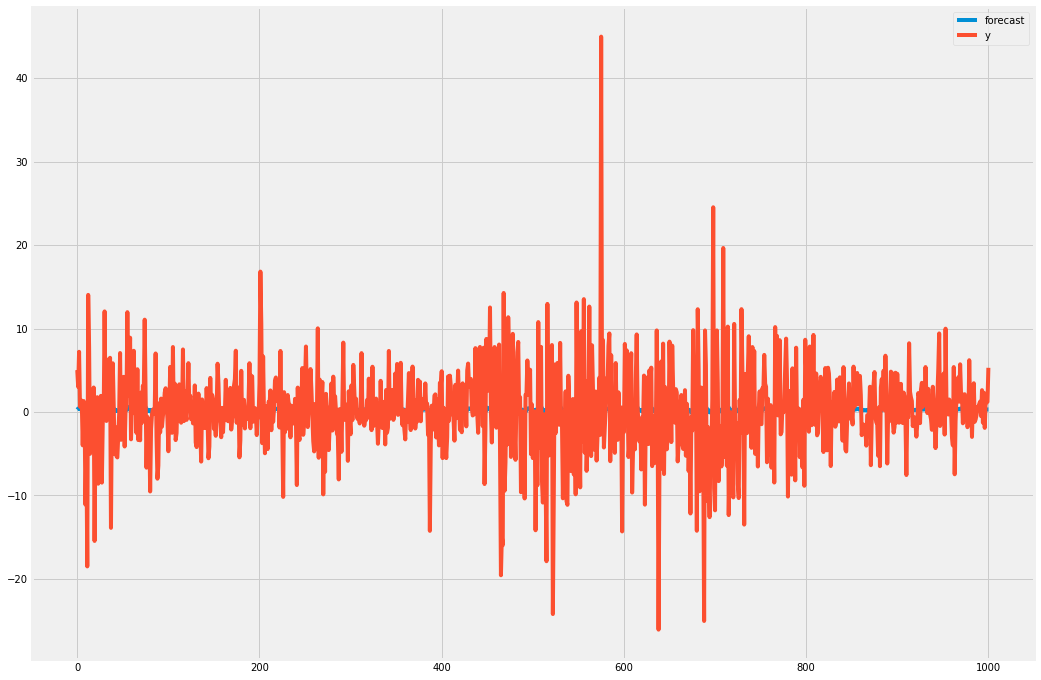

In [ ]:
humid = ARMA(stockData["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=0, end=1000)
plt.show()

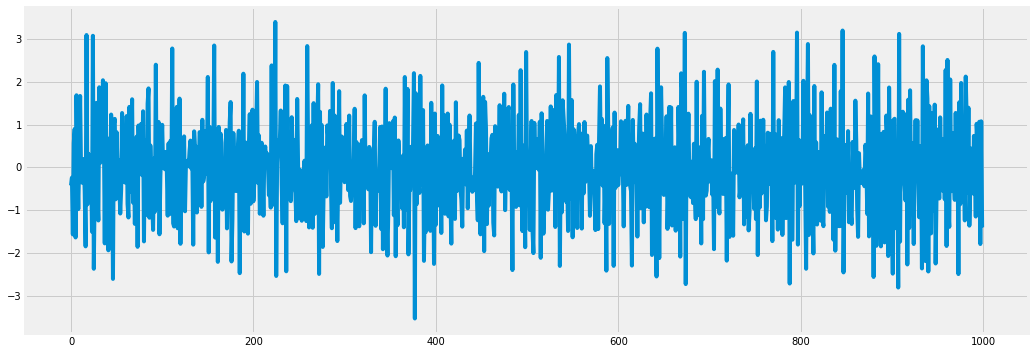

In [ ]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

In [ ]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Tue, 05 Apr 2022   AIC                           2852.553
Time:                        15:17:48   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751608.120
Date:                Tue, 05 Apr 2022   AIC                         110833.948
Time:                        15:17:54   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9915.705     -2.047      0.041   -3.97e+04    -862.777
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.080      0.0

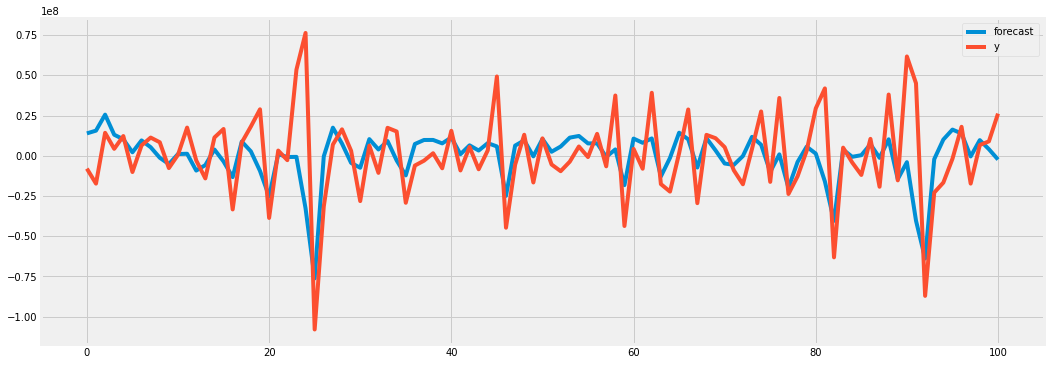

In [ ]:
model = ARMA(stockData1["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(stockData["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 16342213.15593823.


                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Tue, 05 Apr 2022   BIC                          24506.556
Time:                        15:18:22   HQIC                         24441.099
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.67, 78.76   Jarque-Bera (JB):   48240.56, 14927.64
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

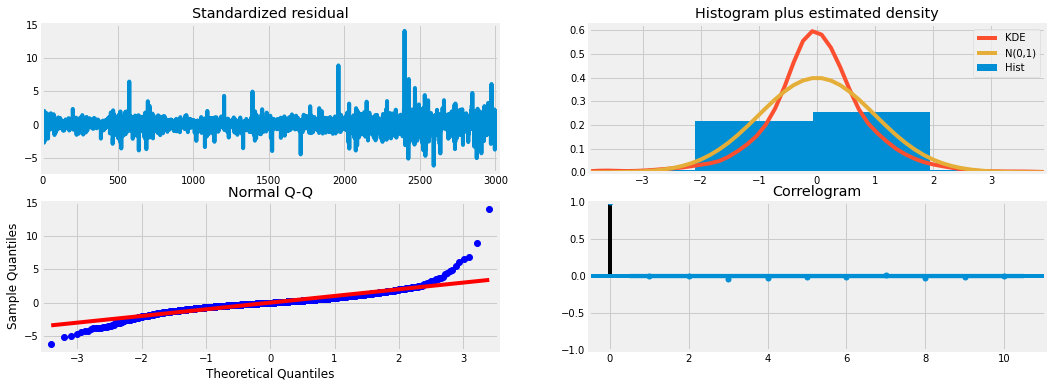

In [ ]:
train_sample = pd.concat([stockData["Close"].diff().iloc[1:],stockData1["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

ins1 = SimpleExpSmoothing(np.asarray(stockData['Close']))
# ins_cast1 = ins1.forecast(3)
fit1 = model.fit()
pred1 = fit1.forecast(9)

In [ ]:
stockData

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498,3.049759
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785,0.578549
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991,4.199115
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157,0.615737
...,...,...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL,0.994617,-0.538273
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL,0.997331,-0.266861
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL,0.999448,-0.055199


##Conclusion:
1) I was able to understand trends in time series<br>
2) I was able to apply ARMA model on the time series data